# Using APIs and Intro to Machine Learning
#### Connor Leggett

## Using an API

In [1]:
# Importing necessary libraries
import urllib
import requests
import time

### Finding Song Lyrics

In [13]:
# Base URL:
base_url = "https://api.lyrics.ovh/v1/"

# User's input
song = input("Song: ")
artist = input("Artist: ")

# Create a new url based on users requests:
data = requests.get(base_url + artist + "/" + song).json
print(data['lyrics'])

# Making sure the API returned a value

Song: tr
Artist: asdf


TypeError: 'method' object is not subscriptable

## Making an API

In [4]:
# Necessary imports
import random
from flask import Flask, request
import random

### Random Number API

In [10]:
# Initialize flask app
app = Flask(__name__)

# On the main page, return a random number (as a string)
@app.route("/", methods=['GET'])
def first_api():
    x = random.randrange(1,10)
    return str(x)

#Run the app
app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [07/Oct/2019 18:29:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:29:51] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:29:54] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:29:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:29:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:30:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:30:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:30:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:30:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:30:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:30:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:30:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:30:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:30:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:30:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:30:24] "GE

### Addition API

In [15]:
# Initialize flask app
app = Flask(__name__)

# On the main page, return a random number (as a string)
@app.route("/", methods=['GET'])
def first_api():
    x = random.randrange(1,10)
    return str(x)

# On the add page, take two arguments, add them, and return the string
@app.route("/add", methods=['GET'])
def add():
    x = request.args.get("first")
    y = request.args.get("second")
    return str(int(x) + int(y))

# Run the application
app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [07/Oct/2019 18:33:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Oct/2019 18:33:42] "GET / HTTP/1.1" 200 -


## Data Science

In [3]:
# Necessary imports:
import json
import pandas as pd
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import random
import os

# Setting up current directory:
CURRENT_DIRECTORY = os.getcwd()

### K Nearest Neighbors

In [8]:
# Importing data from a csv file
dataset = pd.read_csv(CURRENT_DIRECTORY + "/iris_data.csv")

# Adding an Id tag to the dataframe
dataset["Id"] = range(150)

# Check how many of each species we have

# splitting up the labels and the values for each species:
feature_columns = ['SepalLength', 'SepalWidth']

# Encoding Labels (Turning string species names into integers)
# setosa -> 0
# versicolor -> 1
# virginica -> 2
dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,Id
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,3
4,5.0,3.6,1.4,0.2,Iris-setosa,4
5,5.4,3.9,1.7,0.4,Iris-setosa,5
6,4.6,3.4,1.4,0.3,Iris-setosa,6
7,5.0,3.4,1.5,0.2,Iris-setosa,7
8,4.4,2.9,1.4,0.2,Iris-setosa,8
9,4.9,3.1,1.5,0.1,Iris-setosa,9


### Visualize the data

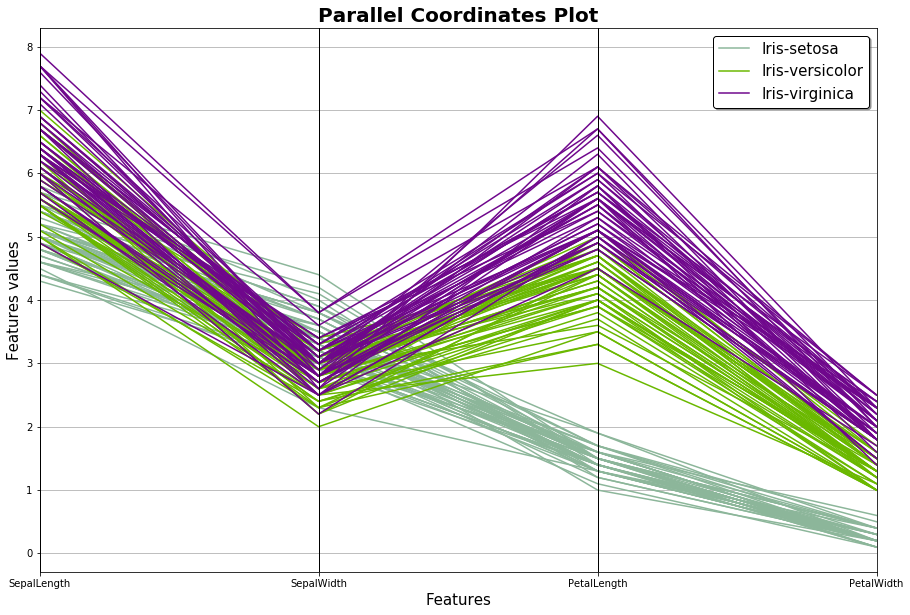

In [5]:
# Data Visualization:
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

### Train the model

In [6]:
# Splitting into training and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Creating the learning model
knn_classifier = KNeighborsClassifier(n_neighbors=10)

# Fitting the model with the training data
knn_classifier.fit(X_train, Y_train)

NameError: name 'X' is not defined

### Test the model

In [ ]:
# Making predictions with the test data (This line is also where we would potentially classify new data)
Y_pred = knn_classifier.predict(X_test)
print(Y_pred)

# Finding Accuracy:
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy of model: ' + str(round(accuracy, 2)) + ' %.')

### Try out different k values

In [5]:
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())



# Displaying results visually
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.plot(k_list, cv_scores)

plt.show()

NameError: name 'X_train' is not defined

## Making an API for our model

In [ ]:
# Set up Flask App
app = Flask(__name__)

@app.route("/", methods = ['GET'])
def classify():
    # array mapping numbers to flower names
    classes = [ "Iris Setosa", "Iris Versicolor", "Iris Virginica"]
    
    # get values for each component in the form [["sHeight", "sWidth", "pHeight", "pWidth"]]
    values = [] # TODO
    
    
    # Otherwise, return the prediction.
    return ""

# Run the app.
app.run()

# try 127.0.0.1:5000?sHeight=5.2&sWidth=4.6&pHeight=4.2&sHeight=7.8
    